In [1]:
from datetime import datetime, timedelta
from datetime import date

import glob
import os

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import pandas as pd

import stock_research as sr


In [2]:
start_date = datetime(2022, 5, 1)
end_date = datetime(2022, 5, 13)
sdate = start_date.strftime('%Y%m%d')
edate = end_date.strftime('%Y%m%d')
date = '2022-03-30'
SUMMARY_TYPE = 2
params = {'date': date, 'type': SUMMARY_TYPE}
EDINET_API_URL = "https://disclosure.edinet-fsa.go.jp/api/v1"
save_path = '../warehouse/stock/original_data/'

In [7]:
print(f'start_date:{start_date}')
print(f'end_date:{end_date}')
print(f'sdate:{sdate}')
print(f'edate:{edate}')
print(f'date:{date}')
print(f'SUMMARY_TYPE:{SUMMARY_TYPE}')
print(f'params:{params}')

start_date:2022-05-01 00:00:00
end_date:2022-05-13 00:00:00
sdate:20220501
edate:20220513
date:2022-03-30
SUMMARY_TYPE:2
params:{'date': '2022-03-30', 'type': 2}


In [4]:
doc_summary = sr.get_submitted_summary(params)
df_doc_summary = pd.DataFrame(doc_summary['results'])

https://disclosure.edinet-fsa.go.jp/api/v1/documents.json


ConnectionError: HTTPSConnectionPool(host='disclosure.edinet-fsa.go.jp', port=443): Max retries exceeded with url: /api/v1/documents.json?date=2022-03-30&type=2 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001D0FCB7B940>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [7]:
  SUMMARY_TYPE = 2


In [80]:
doc_type_code=['120']
 
for i, date in enumerate(date_range(start_date, end_date)):
    date_str = str(date)[:10]
    df_doc_summary = sr.download_all_documents(date_str, save_path, doc_type_code)
    if i == 0:
        df_doc_summary_all = df_doc_summary.copy()
    else:
        df_doc_summary_all = pd.concat([df_doc_summary_all, df_doc_summary])
    print(date_str,df_doc_summary_all.shape)


https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-05-01 (0, 0)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-05-02 (19, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-05-03 (19, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-05-04 (19, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-05-05 (19, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-05-06 (50, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-05-07 (50, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-05-08 (50, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-05-09 (74, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-05-10 (92, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-05-11 (100, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-05-12 (123, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-0

In [43]:

files = glob.glob(save_path+'*')
for file in files:
    print(file)

../warehouse/stock/original_data\2022-05-02
../warehouse/stock/original_data\2022-05-06
../warehouse/stock/original_data\2022-05-09
../warehouse/stock/original_data\2022-05-10
../warehouse/stock/original_data\2022-05-11
../warehouse/stock/original_data\2022-05-12
../warehouse/stock/original_data\2022-05-13


In [42]:
save_path

'../warehouse/stock/original_data/'

In [51]:
start_date = datetime(2022, 5, 1)
end_date = datetime(2022, 5, 13)
i = -1
for date in sr.date_range(start_date, end_date):
    date_str = str(date)[:10]
    tmppath = save_path + date_str + '/doc_summary.csv'
    if os.path.exists(tmppath):
        i+=1
        df_doc_summary = pd.read_csv(save_path + date_str + '/doc_summary.csv')
        if i == 0:
            df_doc_summary_all = df_doc_summary.copy()
        else:
            df_doc_summary_all = pd.concat([df_doc_summary_all, df_doc_summary])
        print(date_str,df_doc_summary_all.shape)


2022-05-02 (19, 28)
2022-05-06 (50, 28)
2022-05-09 (74, 28)
2022-05-10 (92, 28)
2022-05-11 (100, 28)
2022-05-12 (123, 28)
2022-05-13 (195, 28)


In [101]:
df_doc_summary_all.sort_values('submitDateTime',ascending=False)
display(df_doc_summary_all[df_doc_summary_all['secCode'].notnull()])

,seqNumber,docID,edinetCode,secCode,JCN,filerName,fundCode,ordinanceCode,formCode,docTypeCode,periodStart,periodEnd,submitDateTime,docDescription,issuerEdinetCode,subjectEdinetCode,subsidiaryEdinetCode,currentReportReason,parentDocID,opeDateTime,withdrawalStatus,docInfoEditStatus,disclosureStatus,xbrlFlag,pdfFlag,attachDocFlag,englishDocFlag
233,234,S100O0LR,E33868,65730,6011001056801,アジャイルメディア・ネットワーク株式会社,None,010,030000,120,2021-01-01,2021-12-31,2022-05-11 15:02,有価証券報告書－第15期(令和3年1月1日－令和3年12月31日),None,None,None,None,None,None,0,0,0,1,1,1,0
139,140,S100O02E,E03219,99760,3070001008818,株式会社 セキチュー,None,010,030000,120,2021-02-21,2022-02-20,2022-05-12 10:16,有価証券報告書－第71期(令和3年2月21日－令和4年2月20日),None,None,None,None,None,None,0,0,0,1,1,1,0
256,257,S100O06O,E03119,82170,2170001002092,株式会社オークワ,None,010,030000,120,2021-02-21,2022-02-20,2022-05-12 13:57,有価証券報告書－第53期(令和3年2月21日－令和4年2月20日),None,None,None,None,None,None,0,0,0,1,1,1,0
177,178,S100O17W,E03415,27780,4180001086075,パレモ・ホールディングス株式会社,None,010,030000,120,2021-02-21,2022-02-20,2022-05-13 09:16,有価証券報告書－第37期(令和3年2月21日－令和4年2月20日),None,None,None,None,None,None,0,0,0,1,1,1,0


In [102]:
 
seccode = 8217
# 文書IDと提出日を取得
doc_id = df_doc_summary_all.query(f'secCode=="{seccode}0"').docID.values[0]
date = df_doc_summary_all.query(f'secCode=="{seccode}0"').submitDateTime.values[0]
file_path = save_path + date[:10] + '/' + doc_id + '/XBRL/PublicDoc/*.xbrl'
file_path = glob.glob(file_path)[0]

# データを取得
sr.get_one_xbrl_data(file_path,
              key='jpcrp_cor:NetSalesSummaryOfBusinessResults', 
              context_ref='CurrentYearDuration')

C:\Users\thyt\tfgpu2\.venv\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


'255996000000'

In [103]:
seccode = 8217
doc_id = df_doc_summary_all.query(f'secCode=="{seccode}0"').docID.values[0]
date = df_doc_summary_all.query(f'secCode=="{seccode}0"').submitDateTime.values[0]
file_path = save_path + date[:10] + '/' + doc_id + '/XBRL/PublicDoc/*.xbrl'
file_path = glob.glob(file_path)[0]
account_df_path = '../warehouse/stock/accountdf/account_df.csv'
print(f'seccode:{seccode}')
print(f'doc_id:{doc_id}')
print(f'date:{date}')
print(f'file_path:{file_path}')
print(f'account_df_path:{account_df_path}')

In [105]:
account_df = pd.read_csv(account_df_path)
sr.get_xbrl_data(file_path, account_df)

,name,prior_year,key,context_ref,value
0,net_sales_summary,4,jpcrp_cor:NetSalesSummaryOfBusinessResults,Prior4YearDuration,259523000000
1,net_sales_summary,3,jpcrp_cor:NetSalesSummaryOfBusinessResults,Prior3YearDuration,255027000000
2,net_sales_summary,2,jpcrp_cor:NetSalesSummaryOfBusinessResults,Prior2YearDuration,255225000000
3,net_sales_summary,1,jpcrp_cor:NetSalesSummaryOfBusinessResults,Prior1YearDuration,268679000000
4,net_sales_summary,0,jpcrp_cor:NetSalesSummaryOfBusinessResults,CurrentYearDuration,255996000000


4 2019-12-31 00:00:00
2015 12 31
2015-12-31
3 2019-12-31 00:00:00
2016 12 31
2016-12-31
2 2019-12-31 00:00:00
2017 12 31
2017-12-31
1 2019-12-31 00:00:00
2018 12 31
2018-12-31
0 2019-12-31 00:00:00
2019 12 31
2019-12-31


Text(0.5, 1.0, 'Net Sales')

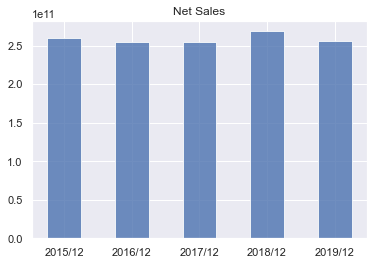

In [142]:
# 売上を取得
net_sales_summary = account_df.query('name=="net_sales_summary"').copy()
# 数値データに変換
net_sales_summary['value'] = net_sales_summary['value'].astype('float')
# x軸用に調整
years = [sr.calc_fiscal_year(prior_year, asof=datetime(2019,12,31))\
         for prior_year in net_sales_summary.prior_year]

net_sales_summary['fiscal_year'] = [str(year.year)+'/'+str(year.month) for year in years]
# 棒グラフを作成
plt.bar(net_sales_summary['fiscal_year'], net_sales_summary['value'], 
        color='b', alpha=0.8, width=0.5)
plt.title('Net Sales')